In [1]:
import acalib

In [2]:
cube = acalib.load('OMC-3_HC3N.pbcor.fits')

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: Removing superfluous dimension STOKES (kept in the metadata) [acalib.io.fits]


In [3]:
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.8591250292  -5.176231228346  90985637448.7  
CRPIX : 257.0  257.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0007833333333333  0.0007833333333333  -70709.28936768  
NAXIS : 512  512  300  1

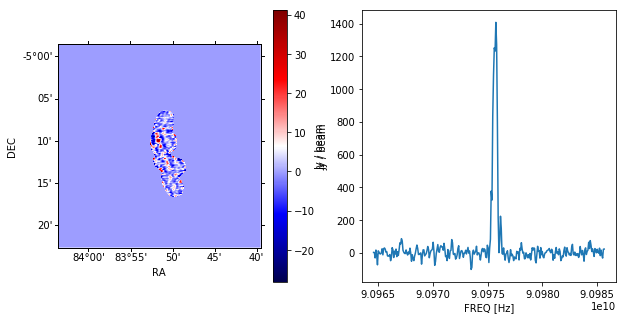

array([[  0,   0,   0],
       [299, 512, 511]])

In [4]:
cube.select_region(interactive=True)

In [5]:
usable=cube.cut([[0, 120, 211], [299, 350, 334]])

In [6]:
usable.visualize()

/Users/mauricio/anaconda3/envs/adassws/lib/python3.6/site-packages/ipyvolume-0.4.5-py3.6.egg/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


VBox(children=(VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.39, max=1.0, step=0.001), FloatSlider(value=0.54, max=1.0, step=0.001), FloatSlider(value=0.6, max=1.0, step=0.001))), HBox(children=(Label(value='opacities:'), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001))))), Figure(camera_center=[0.0, 0.0, 0.0], data_max=10.202369689941406, data_min=-4.224293231964111, height=456, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'visible': True, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': True}, 'background-color': 'black'}, tf=TransferFunctionWidgetJs3(level1=0.39, level2=0.54, level3=0.6, opacity1=0.2, opacity2=0.2, opacity3=0.2), volume_data=array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32), width=1024, xlabel='RA [deg]', xlim=[83.89452539658885, 83.79778191712774], ylabel='DEC [deg]', ylim=[-5.282763640603511, -5.10259492384115], zlabel='FREQ [Hz]', zlim=[90985637448.7, 90964495371.17906])))

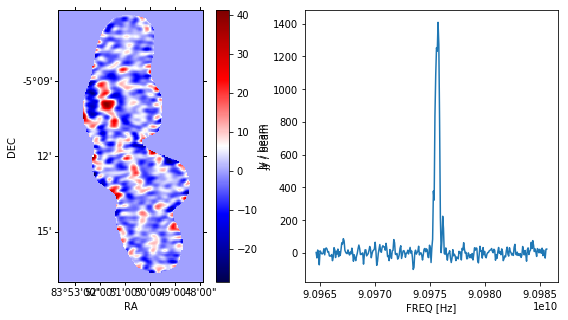

array([[  0,   0,   0],
       [298, 230, 123]])

In [7]:
usable.select_band(interactive=True)

In [8]:
usable=usable.cut([[125, 0, 0], [161, 229, 123]])

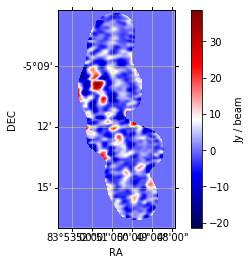

In [9]:
usable.visualize_image(cmap="seismic")

In [10]:
s_usable, a, b = acalib.standarize(usable)
result=acalib.core.snr_estimation(s_usable.data,mask=s_usable.mask,points=1000,full_output=True,max_rms=2.0)

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


/Users/mauricio/scm/acalib/acalib/core/statistics.py:58: RuntimeWarning: invalid value encountered in greater
  sdata = data[data > noise]


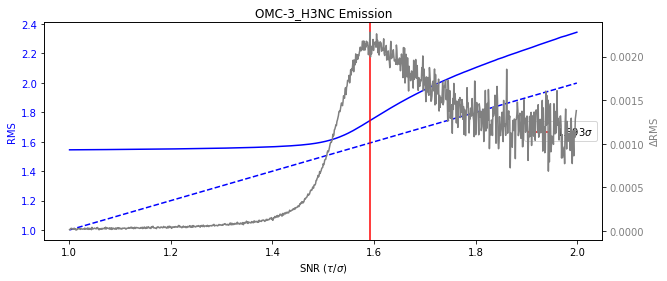

In [11]:
# Display it
import matplotlib.pyplot as plt
acalib.plot_snr_estimation("OMC-3_H3NC Emission",result)
plt.show()

In [12]:
# unpack
(snrlimit, noise, _, _, _, _, _) = result
print(snrlimit)
print(noise)

1.593
1.5389231677353248e-06


In [13]:
halgo = acalib.HRep()
halgo.config['NOISE'] = noise
halgo.config['SNR'] = snrlimit
halgo.config['KERNEL'] = 'METABUBBLE'
halgo.config['VERBOSE'] = True
%time (rep,syn,res) = halgo.run(usable)


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]
INFO: Iteration: 1000 [acalib.core.compact_rep]
INFO: Maximum energy E = 3.083626e-06 SNR = 2.0037557184322354 [acalib.core.compact_rep]
INFO: Iteration: 2000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.7526044e-06 SNR = 1.7886561312920377 [acalib.core.compact_rep]
INFO: Iteration: 3000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.619648e-06 SNR = 1.70226045881429 [acalib.core.compact_rep]
INFO: Iteration: 4000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.552518e-06 SNR = 1.6586390274660807 [acalib.core.compact_rep]
INFO: Iteration: 5000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.5116622e-06 SNR = 1.6320906804775719 [acalib.core.compact_rep]
INFO: Iteration: 6000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.4824117e-06 SNR = 1.6130835675231028 [acalib.core.compact_rep]
INFO: Iteration: 7000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.4605629e-

In [14]:
rep.meta

{'DELTAX': 1,
 'DELTAY': 2.0,
 'DELTAZ': 2.0,
 'GAMMA': 0.1,
 'KERNEL': 'METABUBBLE',
 'NOISE': 1.5389231677353248e-06,
 'SCALE': 1791472.1,
 'SHIFT': -4.224293,
 'SNR': 1.593}

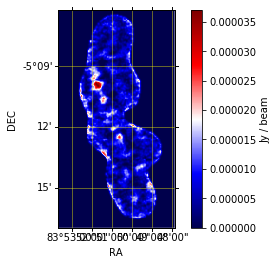

In [15]:
syn.visualize_image(cmap="seismic")

In [16]:
syn.visualize()

/Users/mauricio/anaconda3/envs/adassws/lib/python3.6/site-packages/ipyvolume-0.4.5-py3.6.egg/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


VBox(children=(VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.39, max=1.0, step=0.001), FloatSlider(value=0.54, max=1.0, step=0.001), FloatSlider(value=0.6, max=1.0, step=0.001))), HBox(children=(Label(value='opacities:'), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001))))), Figure(camera_center=[0.0, 0.0, 0.0], data_max=5.912784176729517e-06, height=456, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'visible': True, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': True}, 'background-color': 'black'}, tf=TransferFunctionWidgetJs3(level1=0.39, level2=0.54, level3=0.6, opacity1=0.2, opacity2=0.2, opacity3=0.2), volume_data=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]), width=1024, xlabel='RA [deg]', xlim=[83.89452539658885, 83.79778184223446], ylabel='DEC [deg]', ylim=[-5.282763640603511, -5.103378257810939], zlabel='FREQ [Hz]', zlim=[90976798787.52904, 90974253253.1118])))

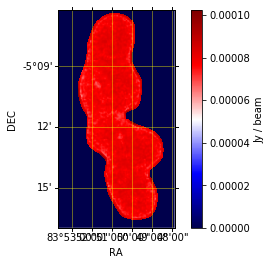

In [17]:
res.visualize_image(cmap="seismic")

In [18]:
#from astropy.io import ascii
#tab=rep['center'].data
#ascii.write(tab,"REP-OrionBar-CO.dat")
rep.write('REP-OMC3-HC3N.fits',overwrite=True)
hdu=acalib.Data_to_HDU(syn,primary=True)
hdu.writeto("SYN-OMC3-HC3N.fits",clobber=True)
hdu=acalib.Data_to_HDU(res,primary=True)
hdu.writeto("RES-OMC3-HC3N.fits",clobber=True)

In [19]:
import numpy as np
import scipy
A=np.array(usable.mask,dtype=int)
B=scipy.ndimage.morphology.distance_transform_edt(1-A) 

In [20]:
C=B/25.0
C[C>1.0]=1.0
dat = usable.data*C

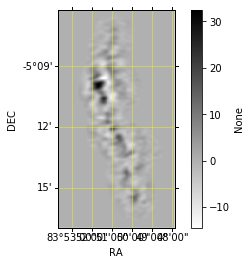

In [21]:
acalib.visualize_image(acalib.moment0(dat,wcs=usable.wcs,mask=usable.mask))

In [22]:
acalib.visualize_volume(dat,wcs=usable.wcs,unit=usable.unit)

/Users/mauricio/anaconda3/envs/adassws/lib/python3.6/site-packages/ipyvolume-0.4.5-py3.6.egg/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


VBox(children=(VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.39, max=1.0, step=0.001), FloatSlider(value=0.54, max=1.0, step=0.001), FloatSlider(value=0.6, max=1.0, step=0.001))), HBox(children=(Label(value='opacities:'), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001))))), Figure(camera_center=[0.0, 0.0, 0.0], data_max=6.9779414976518055, data_min=-3.081566572189331, height=456, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'visible': True, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': True}, 'background-color': 'black'}, tf=TransferFunctionWidgetJs3(level1=0.39, level2=0.54, level3=0.6, opacity1=0.2, opacity2=0.2, opacity3=0.2), volume_data=array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]]), width=1024, xlabel='RA [deg]', xlim=[83.89452539658885, 83.79778184223446], ylabel='DEC [deg]', ylim=[-5.282763640603511, -5.103378257810939], zlabel='FREQ [Hz]', zlim=[90976798787.52904, 90974253253.1118])))

In [23]:
cubep=cube.cut([[0, 256, 242], [599, 285, 268]])


In [24]:
scube,yf,ls= acalib.standarize(cube)

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


In [25]:
A=np.array(scube.mask,dtype=int)
B=scipy.ndimage.morphology.distance_transform_edt(1-A) 
C=B/20.0
C[C>1.0]=1.0
dat = scube.data*C

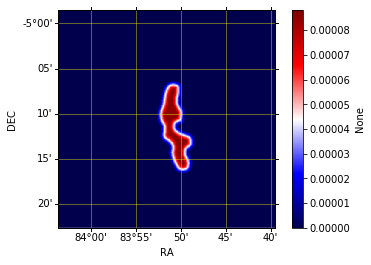

In [26]:
acalib.visualize_image(acalib.moment0(dat,wcs=scube.wcs,mask=scube.mask),cmap="seismic")

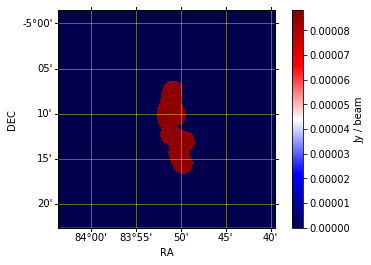

In [27]:
scube.visualize_image(cmap="seismic")

In [28]:
cubep.visualize()

VBox(children=(VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.39, max=1.0, step=0.001), FloatSlider(value=0.54, max=1.0, step=0.001), FloatSlider(value=0.6, max=1.0, step=0.001))), HBox(children=(Label(value='opacities:'), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001), FloatSlider(value=0.2, max=0.2, step=0.001))))), Figure(camera_center=[0.0, 0.0, 0.0], data_max=8.156262397766113, data_min=-3.4345617294311523, height=456, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'visible': True, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': True}, 'background-color': 'black'}, tf=TransferFunctionWidgetJs3(level1=0.39, level2=0.54, level3=0.6, opacity1=0.2, opacity2=0.2, opacity3=0.2), volume_data=array([[[-0.12627062, -0.10707098, -0.08867604, ..., -0.09564135,
         -0.06806216, -0.02817977],
        [-0.18505254, -0.16904855, -0.15286368, ..., -0.06531989,
         -0.02504267,  0.02045799],
        [-0.21046805, -0.19383764, -0.17781143, ..., -0.00337781,
          0.0489649 ,  0.09322964],
        ...,
        [-0.05695469, -0.01224483,  0.03830538, ..., -0.03867019,
         -0.02570957, -0.01686536],
        [ 0.19214693,  0.21560253,  0.22878996, ..., -0.07209553,
         -0.05781006, -0.03981071],
        [ 0.36265785,  0.38633168,  0.37714955, ..., -0.05499835,
         -0.05595594, -0.04896293]],

       [[ 0.0276498 ,  0.09673202,  0.12087565, ..., -0.08672213,
         -0.07260679, -0.03331906],
        [ 0.08058266,  0.17998767,  0.20711723, ..., -0.07838891,
         -0.05568139, -0.01374068],
        [ 0.04039174,  0.1536725 ,  0.19577245, ..., -0.04059603,
         -0.01541762,  0.01530054],
        ...,
        [-0.0901405 ,  0.02738304,  0.12306743, ...,  0.10496937,
          0.1334837 ,  0.12863973],
        [ 0.03137136,  0.14686066,  0.23577686, ...,  0.02185453,
          0.03975353,  0.029176  ],
        [ 0.10710959,  0.17585798,  0.22809525, ..., -0.00183877,
          0.00708054, -0.00860145]],

       [[-0.03283205, -0.03329444, -0.04234586, ..., -0.03606157,
         -0.02743816, -0.00336253],
        [ 0.08325638,  0.08292203,  0.04177503, ..., -0.0352236 ,
         -0.01817488,  0.01133619],
        [ 0.19131348,  0.20184062,  0.1486114 , ..., -0.05050454,
         -0.034782  , -0.00730912],
        ...,
        [ 0.12419879,  0.16544169,  0.18646798, ...,  0.07664659,
          0.09357671,  0.08702832],
        [ 0.1519483 ,  0.20877856,  0.23756362, ...,  0.01398642,
          0.05173924,  0.0625423 ],
        [ 0.10915855,  0.16295221,  0.19470963, ..., -0.01762358,
          0.03347521,  0.05588602]],

       ...,

       [[ 0.02191955,  0.03452775,  0.03501607, ...,  0.00169004,
         -0.02474436, -0.03953761],
        [ 0.04718996,  0.04531554,  0.04407604, ..., -0.01520531,
         -0.04312691, -0.06767043],
        [ 0.03132903,  0.02498583,  0.02759179, ..., -0.03004468,
         -0.05379075, -0.07742152],
        ...,
        [ 0.05824196,  0.14304167,  0.20890224, ...,  0.09165101,
          0.08344752,  0.06666567],
        [-0.03238254,  0.03846697,  0.08780497, ...,  0.08612923,
          0.08801664,  0.08018808],
        [-0.05952631, -0.02600379, -0.01700065, ...,  0.05610637,
          0.06642336,  0.06953641]],

       [[ 0.08670623,  0.06123111,  0.00290279, ...,  0.13351077,
          0.07769677,  0.01851238],
        [ 0.1012345 ,  0.0837591 ,  0.04624701, ...,  0.05842197,
          0.0109183 , -0.03740907],
        [ 0.04959142,  0.03815025,  0.02782097, ..., -0.02348145,
         -0.03890155, -0.05563623],
        ...,
        [-0.02790418,  0.12227487,  0.22176269, ..., -0.02784023,
         -0.02784223, -0.04196842],
        [-0.04862366,  0.06592905,  0.14397489, ...,  0.01503596,
        